<a href="https://www.kaggle.com/code/dietzschenostoevsky/mnist-multiple-classifiers?scriptVersionId=126778901" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Timing Code

For future reference

In [2]:
# Timing Code 

import pytz
import time
import datetime

t0 = time.time()
now_utc = datetime.datetime.utcnow()
ist_tz = pytz.timezone('Asia/Kolkata')
now_ist = now_utc.astimezone(ist_tz)
print("Current time in IST:", now_ist.strftime("%Y-%m-%d %H:%M:%S %Z%z"))

Current time in IST: 2023-04-22 16:32:23 IST+0530


# Using MNIST Dataset and classifying using different classification algorithms 

### Setup

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


## Loading Dataset

In [84]:
train = pd.read_csv(r"/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv(r"/kaggle/input/digit-recognizer/test.csv")

In [85]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [87]:
X = train.drop(['label'], axis=1)
y = train['label']



In [91]:
X_np = X.to_numpy()
y_np = y.to_numpy()
test_np = test.to_numpy()
print("Total Images :", X_np.shape[0])
print("Total Labels: ",y_np.shape[0])
print("Test Set Images: ",test_np.shape[0])

Total Images : 42000
Total Labels:  42000
Test Set Images:  28000


## Creating Test-Train split

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_np,y_np, test_size=0.2, random_state=73)

# Print the size of the training and test sets
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("total images = ",len(X_train)+ len(X_test))


Training set size: 33600
Test set size: 8400
total images =  42000


## Defining a test Digit 

In [93]:
i = 1
some_digit = X_np[i]


## Visualizing the Images 

In [94]:
import matplotlib.pyplot as plt

def plot_digit(image_data, true_label=0):
    """ Takes numpy array image data from MNIST dataset and plots the image"""
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.title(f'True label: {true_label}', fontsize=8)
    plt.axis("off")

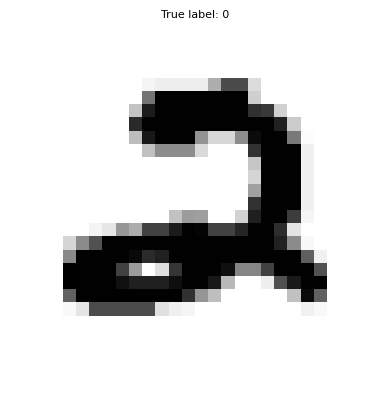

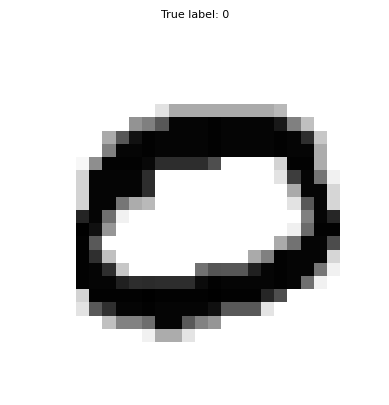

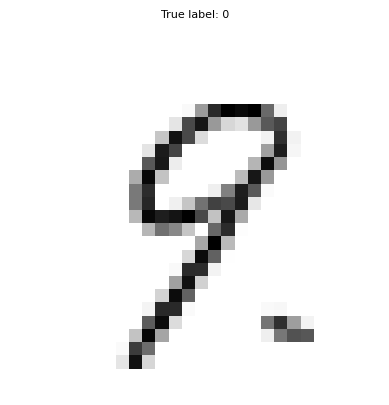

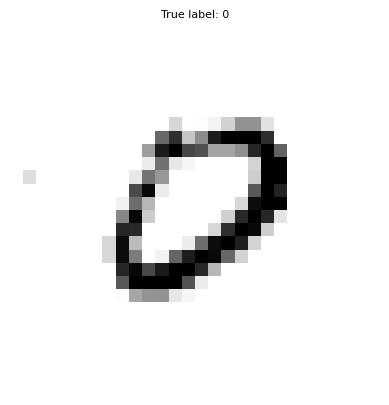

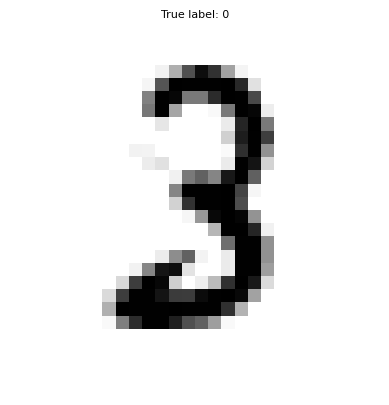

In [106]:
for i in range(5):
    plot_digit(test_np[i])
    plt.show()

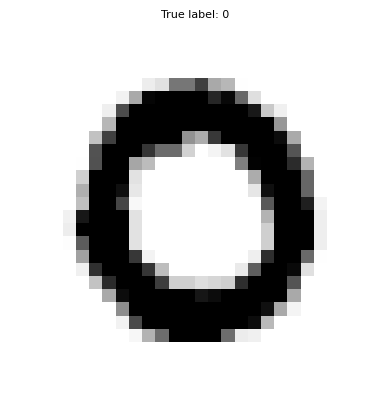

True label : 0


In [95]:
plot_digit(some_digit)
plt.show()
print(F"True label : {y_np[i]}")

### viewing first 100 images 


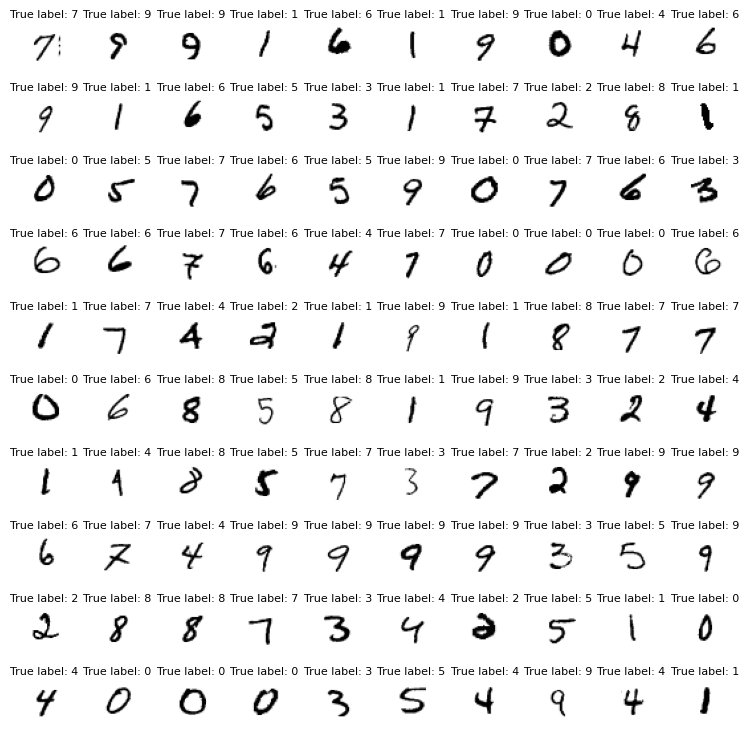

In [97]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X_train[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data,true_label=y_train[idx])
plt.subplots_adjust(wspace=1, hspace=1)

plt.show()

# Multiclass Classification

## SVM Classification

In [98]:
X_train.shape

(33600, 784)

In [100]:
import time
t1 = time.time()
from sklearn.svm import SVC

svm_clf = SVC(random_state=73, verbose=False)
svm_clf.fit(X_train, y_train) # using the full y_train
print(F"took {time.time() - t1:.2f} secs to run")

took 119.99 secs to run


In [101]:
svm_clf.predict([some_digit])

array([0])

In [102]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [103]:
from sklearn.metrics import accuracy_score
y_pred = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy SVM:", accuracy_svm)

Accuracy SVM: 0.9748809523809524


### Generating Submission File

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

`ImageId,Label
1,3
2,7
3,8 
(27997 more lines)`

In [108]:
y_pred_test = svm_clf.predict(test_np)

In [109]:
y_pred_test[:5]

array([2, 0, 9, 9, 3])

In [111]:
y_pred_test.shape

(28000,)

In [113]:
submission_df = pd.DataFrame({'ImageId': range(1, len(y_pred_test)+1), 'Label': y_pred_test})
submission_df.to_csv('submission.csv', index=False)

In [114]:
import pandas as pd

# Read the submission CSV file
submission_df = pd.read_csv('submission.csv')

# Print the contents of the DataFrame
print(submission_df.head())


   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
